# Categorical data analysis

working with nominal scale data


## The $\chi^2$ goodness-of-fit test

Have people imaging a shuffled deck of cards and pick 2 cards at random. Are the cards that people pick actually random?<br>

In [1]:
library(lsr)
load("randomness.Rdata")
who(TRUE)

   -- Name --   -- Class --   -- Size --
   cards        data.frame    200 x 3   
    $id         factor        200       
    $choice_1   factor        200       
    $choice_2   factor        200       

In [2]:
head(cards)

id    choice_1 choice_2
1 subj1 spades   clubs   
2 subj2 diamonds clubs   
3 subj3 hearts   clubs   
4 subj4 spades   clubs   
5 subj5 hearts   spades  
6 subj6 clubs    hearts

In [3]:
observed <- table(cards$choice_1)
observed


   clubs diamonds   hearts   spades 
      35       51       64       50 

notation:

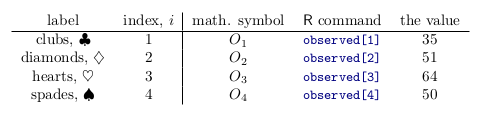

vector of observations $\mathbf{O} = (O_1, O_2, O_3, O_4)$

notat

**The null hypothesis and the alternative hypothesis**<br> 

$H_0$: All four suits are chosen with equal probability<br>
$H_0: \mathbf{P} = (0.25, 0.25, 0.25, 0.25)$ 

$H_1$: At least one of the suit-choice probabilites is not 0.25<br> 
$H_1: \mathbf{P} \neq (0.25, 0.25, 0.25, 0.25)$<br>

In [4]:
probabilities <- c(clubs=0.25, diamonds=0.25, hearts=0.25, spades=0.25)
probabilities

clubs diamonds   hearts   spades 
    0.25     0.25     0.25     0.25

**The "goodness of fit" test statistic**<br>

get something that tells us "how close" the data are to the null hypothesis.<br> 

what are the **expected frequencies**<br> 

$ E_i = N \times P_i$ 
- $E_i$ = number of category i responses that we're expecting if the null is true
- N = num samples
- $P_i$ = probability

In [5]:
N <- 200 # sample size
expected <- N * probabilities # expected frequencies
expected

clubs diamonds   hearts   spades 
      50       50       50       50

calculate difference score: observed - expected

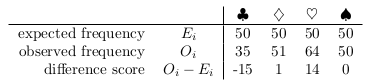

In [6]:
observed - expected


   clubs diamonds   hearts   spades 
     -15        1       14        0 

difference squared

In [7]:
(observed - expected) ^ 2


   clubs diamonds   hearts   spades 
     225        1      196        0 

divide by expected frequency

In [8]:
(observed-expected)^2 / expected


   clubs diamonds   hearts   spades 
    4.50     0.02     3.92     0.00 

now sum these figures up- this gives us our goodness-of-fit statistic

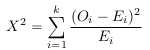

**The sampling distribution of the GOF statistic**<br>

this is a *Chi-squared distribution with k-1 degrees of freedom*<br>

*Why it works*<br> 
If the null is true, then $O_i \sim \text{Binomial}(P_i, N)$<br> 
here, central limit theorem holds, so $O_i$ is approx normal. that means $(O_i - E_i)/\sqrt{E_i}$ is also normally distributed. This means that we are taking a bunch of things that are normally distributed, squaring them, then taking the sum- that's a chi-squared!<br> 

We use $k-1$ degrees of freedom to count the number of INDEPENDENT elements. 

**Degrees of Freedom**

in general: add up the number of distinct quantities used to describe the data, then subtract off all the constraints the must satisfy- e.g. k (4) quantities being summed, and since all the probabilities must sum to 1, subtract 1. 

**Testing the null hypothesis**<br> 
Use a 1-sided test.<br> 
if we want a significance value of $\alpha=0.05$, then we have to pick a critical value such that there is a 5% chances that $X^2$ can be that big if the null hypothesis is true.<br> 

In [9]:
qchisq(p=0.95, df=3)

[1] 7.814728

So our critical value is 7.814. Since our GOF statistic came out to be 8.44, **we can reject the null**. 

get exact p-value

In [10]:
pchisq(q=8.44, df=3, lower.tail=FALSE)

[1] 0.03774185

By default, R gives the probability of getting a value LESS than what we entered, but we want the opposite, so set lower.tail=FALSE<br> 

we can also do:

In [11]:
1-pchisq(q=8.44, df=3)

[1] 0.03774185

This is called **Pearson's $\chi^2$ test for the goodness of fit**

**Doing the test in R**

most people use chisq.test(), there is also goodnessOfFitTest() from lsr package

In [12]:
goodnessOfFitTest(cards$choice_1)


     Chi-square test against specified probabilities

Data variable:   cards$choice_1 

Hypotheses: 
   null:        true probabilities are as specified
   alternative: true probabilities differ from those specified

Descriptives: 
         observed freq. expected freq. specified prob.
clubs                35             50            0.25
diamonds             51             50            0.25
hearts               64             50            0.25
spades               50             50            0.25

Test results: 
   X-squared statistic:  8.44 
   degrees of freedom:  3 
   p-value:  0.038 


In [13]:
goodnessOfFitTest(cards$choice_2)


     Chi-square test against specified probabilities

Data variable:   cards$choice_2 

Hypotheses: 
   null:        true probabilities are as specified
   alternative: true probabilities differ from those specified

Descriptives: 
         observed freq. expected freq. specified prob.
clubs                68             50            0.25
diamonds             44             50            0.25
hearts               41             50            0.25
spades               47             50            0.25

Test results: 
   X-squared statistic:  9 
   degrees of freedom:  3 
   p-value:  0.029 


**Specifying a different null hypothesis**

In [14]:
nullProbs <- c(clubs=0.2, diamonds=0.3, hearts=0.3, spades=0.2)
goodnessOfFitTest(x=cards$choice_1, p=nullProbs)


     Chi-square test against specified probabilities

Data variable:   cards$choice_1 

Hypotheses: 
   null:        true probabilities are as specified
   alternative: true probabilities differ from those specified

Descriptives: 
         observed freq. expected freq. specified prob.
clubs                35             40             0.2
diamonds             51             60             0.3
hearts               64             60             0.3
spades               50             40             0.2

Test results: 
   X-squared statistic:  4.742 
   degrees of freedom:  3 
   p-value:  0.192 


**How to report the results of the test**<br> 

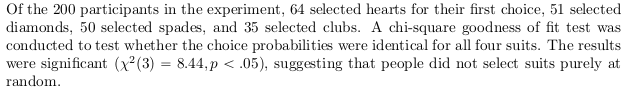

some notes:<br> 
- statistical test is preceded by the descriptive statistics 
- the description tells you what the null hypothesis being tested was
- a 'stat block' is included
- the results are interpreted

**A comment on statistical notation**<br> 

always separate what the test statistic is and the sampling distribution. E.g: the test statistics was the goodness-of-fit, which came from a chi-squared sampling distribution<br> 

## The $\chi^2$ test of independence (or association)

experiment: found a bunch of robots and humans and asked them what their preferences are: A puppy, a pretty flower from your sweetie, or a properly-formatted data file

Do humans and robots have the same preferences?

In [16]:
load("chapek9.Rdata")
who(TRUE)

   -- Name --      -- Class --   -- Size --
   cards           data.frame    200 x 3   
    $id            factor        200       
    $choice_1      factor        200       
    $choice_2      factor        200       
   chapek9         data.frame    180 x 2   
    $species       factor        180       
    $choice        factor        180       
   expected        numeric       4         
   N               numeric       1         
   nullProbs       numeric       4         
   observed        table         4         
   probabilities   numeric       4         

In [17]:
head(chapek9)

species choice
1 robot   flower
2 human   data  
3 human   data  
4 human   data  
5 robot   data  
6 human   flower

In [18]:
summary(chapek9)

  species      choice   
 robot:87   puppy : 28  
 human:93   flower: 43  
            data  :109  

break down the choices by species

In [19]:
chapekFrequencies <- xtabs(~ choice+species, data=chapek9)
chapekFrequencies

        species
choice   robot human
  puppy     13    15
  flower    30    13
  data      44    65

Is the discrepancy between humans and robots statistically significant?<br> 

**Constructing the hypothesis test**

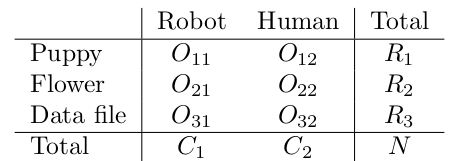

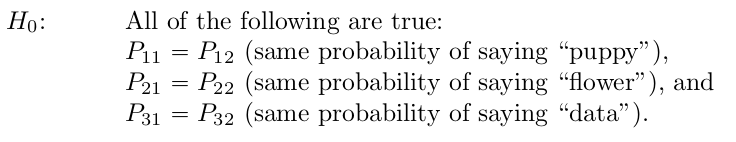

Note: this is exactly the same as the chi-squared test for homogenity

**Calculate expected frequencies**<br> 

$$
\text{expected frequency} = E_{ij} = C_j (\text{Cj people in species j})\times P_i (\text{probability of choosing i})
$$

We need to estimate Pi from the data
$$
\hat{P}_i = \frac{R_i}{N}
$$

so:
$$
E_{ij} = \frac{R_i \times C_j}{N}
$$

**Define the test statistic**<br> 

$$
X^2 = \sum_{i=1}^{r}\sum_{j=1}^{c} = \frac{(E_{ij}-O_{ij})^2}{E_{ij}}
$$

this is chi-squared distributed with $r \times c$ degrees of freedom. However, for constraints:<br> 
$$
df = (r-1)(c-1)
$$

why depends on experimental design<br> 
**intended to get exactly 87 robots and 93 humans and left row totals free to vary**:<br> 
c constraints b/c of fixing column totals. every free parameter in the null hypothesis is like an additional constraint. since probs sum to 1, r-1 of those:

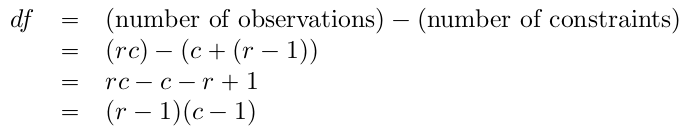

**Fix total sample size**<br> 
just test first 180 people that showed up. r-1 free params in null hypothesis, c-1 free params corresponding to species probs<br> 

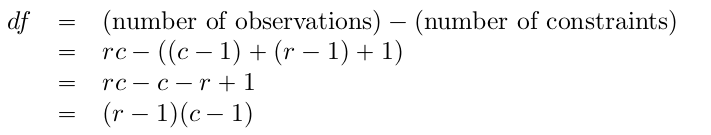

**Doing the test in R**

can use chisq.test(), but first use associationTest() in lsr package

In [22]:
xtabs(~choice+species, data=chapek9)

        species
choice   robot human
  puppy     13    15
  flower    30    13
  data      44    65

In [23]:
associationTest(formula=~choice+species, data=chapek9)


     Chi-square test of categorical association

Variables:   choice, species 

Hypotheses: 
   null:        variables are independent of one another
   alternative: some contingency exists between variables

Observed contingency table:
        species
choice   robot human
  puppy     13    15
  flower    30    13
  data      44    65

Expected contingency table under the null hypothesis:
        species
choice   robot human
  puppy   13.5  14.5
  flower  20.8  22.2
  data    52.7  56.3

Test results: 
   X-squared statistic:  10.722 
   degrees of freedom:  2 
   p-value:  0.005 

Other information: 
   estimated effect size (Cramer's v):  0.244 


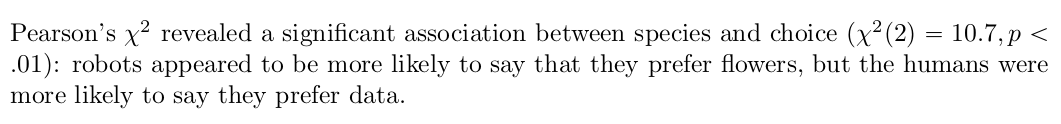

## The continuity correction

**Yates correction**<br> 

Things break down when you only have 1 dof. The $\chi^2$ test is based on the assumption that the binomial distribution looks like a normal for large N, but it doesn't quite work with 1 dof. <br>

$X^2$ is actually discrete (b/c of categorical data), but $\chi^2$ is continuous. Goodness of fit statistic tends to be too big (i.e. p value is too small). Redefine the statistic as:

$$
X^2 = \sum_i \frac{(|E_i-O_i| - 0.5)^2}{E_i}
$$

It's basically a hack

## Effect size

$\phi$ statistic and Cramer's V. 


$$
\phi = \sqrt{\frac{X^2}{N}}
$$
0 (no association) to 1 (perfect association). may be bigger than 1 when contingency table is larger than 2x2. people usually report V:

$$
V = \sqrt{\frac{X^2}{N(k-1)}}
$$

where $k=\text{min(num_rows, num_columns)}$

use cramersV() from lsr

In [24]:
cramersV(chapekFrequencies)

[1] 0.244058

## Assumptions of the test

- Expected frequenceis are sufficiently large. In general, all expected frequencies should be larger than 5. 
- data are independent of one another. 

if independence is violated: can use McNemar or Cochran test. If cell counts (frequencies?) are too small, use Fisher exact test.

## The most typical way to do chi-square in R

In [26]:
chisq.test(x=observed)


	Chi-squared test for given probabilities

data:  observed
X-squared = 8.44, df = 3, p-value = 0.03774


In [27]:
chisq.test(x=observed, p=c(0.2, 0.3, 0.3, 0.2))


	Chi-squared test for given probabilities

data:  observed
X-squared = 4.7417, df = 3, p-value = 0.1917


If you give it a crosstab, the function knows you want a test of independence

In [29]:
chisq.test(chapekFrequencies)


	Pearson's Chi-squared test

data:  chapekFrequencies
X-squared = 10.722, df = 2, p-value = 0.004697


## Fisher exact test

What to do if cell counts are too small? 

In [31]:
load("salem.Rdata")
who(TRUE)

   -- Name --          -- Class --   -- Size --
   cards               data.frame    200 x 3   
    $id                factor        200       
    $choice_1          factor        200       
    $choice_2          factor        200       
   chapek9             data.frame    180 x 2   
    $species           factor        180       
    $choice            factor        180       
   chapekFrequencies   xtabs         3 x 2     
   expected            numeric       4         
   N                   numeric       1         
   nullProbs           numeric       4         
   observed            table         4         
   probabilities       numeric       4         
   trial               data.frame    16 x 2    
    $happy             logical       16        
    $on.fire           logical       16        

In [32]:
salem.tabs <- table(trial)
print(salem.tabs)

       on.fire
happy   FALSE TRUE
  FALSE     3    3
  TRUE     10    0


In [33]:
chisq.test(salem.tabs)

Warning message in chisq.test(salem.tabs):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  salem.tabs
X-squared = 3.3094, df = 1, p-value = 0.06888


Fischer's exact test doesn't use a test statistic, it gets the p-value directly<br> 

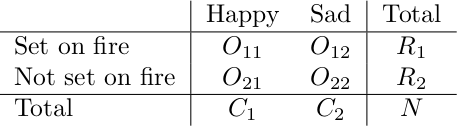

treats both row and column totals as known, fixed quantities- then gives us the probability that we would have gotten those frequencies. 

$$
P(O_{11}, O_{12}, O_{21}, O_{22} | R_1, R_2, R_3, R_4) 
$$

comes from a hypergeometric distribution<br> 

calulate the probability of observing this table or a table that is more extreme. 

In [34]:
fisher.test(salem.tabs)


	Fisher's Exact Test for Count Data

data:  salem.tabs
p-value = 0.03571
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.000000 1.202913
sample estimates:
odds ratio 
         0 


## McNemar test

Figure out how effective some political advertisements are. N=100 people to watch ads. Ask who they'll vote for before and after the ads. 

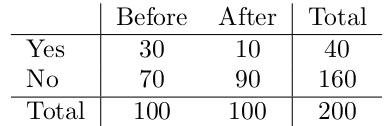

100 people, but 200 observations. This is a violation of independence!<br> 

tabulate your data in a different way: <br>

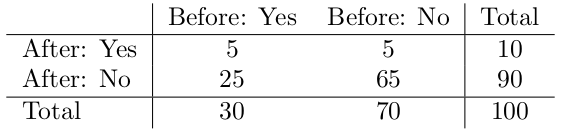

when writing data this way, independence assumption can be satisfied. <br> 
we can use this to give us an $X^2$ goodness of fit statistic.<br> 

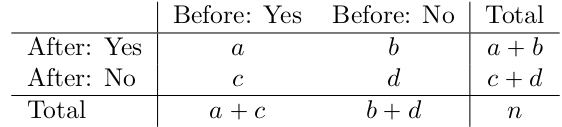


Null hypothesis: The before test and after test answers have the same porportion of people saying "Yes, I will vote for AGPP". We are testing the hypothesis that the row and column totals come from the same distribution.

$$
P_a + P_b = P_a + P_c
$$

$$
P_c + P_d = P_b + P_d
$$

The null hypothesis boils down to:
$$
P_b = P_c
$$

So its only the off-diagonal entries that matter!<br> 

**This is the McNemar test of marginal homogenity**<br> 
same as a usual $\chi^2$ test with the yates correction<br> 

$$
X^2 = \frac{(|b-c|-0.5)^2}{b+c}
$$

**Doing the McNemar test in R**

In [35]:
load("agpp.Rdata")
who(TRUE)

   -- Name --          -- Class --   -- Size --
   agpp                data.frame    100 x 3   
    $id                factor        100       
    $response_before   factor        100       
    $response_after    factor        100       
   cards               data.frame    200 x 3   
    $id                factor        200       
    $choice_1          factor        200       
    $choice_2          factor        200       
   chapek9             data.frame    180 x 2   
    $species           factor        180       
    $choice            factor        180       
   chapekFrequencies   xtabs         3 x 2     
   expected            numeric       4         
   N                   numeric       1         
   nullProbs           numeric       4         
   observed            table         4         
   probabilities       numeric       4         
   salem.tabs          table         2 x 2     
   trial               data.frame    16 x 2    
    $happy             logical       16 

In [36]:
head(agpp)

id     response_before response_after
1 subj.1 no              yes           
2 subj.2 yes             no            
3 subj.3 yes             no            
4 subj.4 yes             no            
5 subj.5 no              no            
6 subj.6 no              no

In [39]:
summary(agpp)

        id     response_before response_after
 subj.1  : 1   no :70          no :90        
 subj.10 : 1   yes:30          yes:10        
 subj.100: 1                                 
 subj.11 : 1                                 
 subj.12 : 1                                 
 subj.13 : 1                                 
 (Other) :94                                 

In [40]:
right.table <- xtabs(~response_before+response_after, data=agpp)
print(right.table)

               response_after
response_before no yes
            no  65   5
            yes 25   5


In [41]:
mcnemar.test(right.table)


	McNemar's Chi-squared test with continuity correction

data:  right.table
McNemar's chi-squared = 12.033, df = 1, p-value = 0.0005226


## What's the difference between McNemar and independence?

From beginning of chapter: we actually had people make 2 card choices. <br> 
we can crosstab the first choice against second choice

In [42]:
cardChoices <- xtabs(~choice_1 + choice_2, data=cards)
cardChoices

          choice_2
choice_1   clubs diamonds hearts spades
  clubs       10        9     10      6
  diamonds    20        4     13     14
  hearts      20       18      3     23
  spades      18       13     15      4

Is the choice you made the second time dependent on the choice you made the first time? 

In [43]:
chisq.test(cardChoices)


	Pearson's Chi-squared test

data:  cardChoices
X-squared = 29.237, df = 9, p-value = 0.0005909


ON average, were the frequencies of suit choices different the second time? (i.e. are the row totals in cardChoices (frequencies for choice 1) different from column totals (frequencies for choice 2))

In [44]:
mcnemar.test(cardChoices)


	McNemar's Chi-squared test

data:  cardChoices
McNemar's chi-squared = 16.033, df = 6, p-value = 0.01358


## Summary

- chi-squared goodness of fit: comparing observed probabilities against what you think the probabilies are
- chi-squared test of independence: contingency table (cross-tab) of 2 categorical variables. Null: there is no association
- Effect size for contingency: usually Cramer's V
- 2 assumptions:
    - expected frequencies are sufficiently large (if not, use Fisher exact test)
    - data are independent (if not, use mcnemar)